# <u> DMPM Lab 11</u>

## Saniya Inamdar
## SRN: 201900913
## Roll no.: 17

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [4]:
df = pd.read_csv("tit.csv")

# Preprocessing : 

In [5]:
df.head()

,x,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,home.dest
0,1,1,1,"Allen, Miss. Elisabeth Walton",female,29,0,0,24160,211.3375,B5,S,"St Louis, MO"
1,2,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.55,C22 C26,S,"Montreal, PQ / Chesterville, ON"
2,3,1,0,"Allison, Miss. Helen Loraine",female,2,1,2,113781,151.55,C22 C26,S,"Montreal, PQ / Chesterville, ON"
3,4,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30,1,2,113781,151.55,C22 C26,S,"Montreal, PQ / Chesterville, ON"
4,5,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25,1,2,113781,151.55,C22 C26,S,"Montreal, PQ / Chesterville, ON"


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 13 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   x          1309 non-null   int64 
 1   pclass     1309 non-null   int64 
 2   survived   1309 non-null   int64 
 3   name       1309 non-null   object
 4   sex        1309 non-null   object
 5   age        1309 non-null   object
 6   sibsp      1309 non-null   int64 
 7   parch      1309 non-null   int64 
 8   ticket     1309 non-null   object
 9   fare       1309 non-null   object
 10  cabin      1309 non-null   object
 11  embarked   1309 non-null   object
 12  home.dest  1309 non-null   object
dtypes: int64(5), object(8)
memory usage: 133.1+ KB


In [8]:
df = df.drop(['x','name', 'ticket','cabin','home.dest'], axis = 1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   pclass    1309 non-null   int64 
 1   survived  1309 non-null   int64 
 2   sex       1309 non-null   object
 3   age       1309 non-null   object
 4   sibsp     1309 non-null   int64 
 5   parch     1309 non-null   int64 
 6   fare      1309 non-null   object
 7   embarked  1309 non-null   object
dtypes: int64(4), object(4)
memory usage: 81.9+ KB


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   pclass    1309 non-null   int64 
 1   survived  1309 non-null   int64 
 2   sex       1309 non-null   object
 3   age       1309 non-null   object
 4   sibsp     1309 non-null   int64 
 5   parch     1309 non-null   int64 
 6   fare      1309 non-null   object
 7   embarked  1309 non-null   object
dtypes: int64(4), object(4)
memory usage: 81.9+ KB


In [11]:
df = df.replace(to_replace = "?", value =np.nan)


In [12]:
age = df.loc[:, 'age'].values.reshape(-1,1)

from sklearn.impute import SimpleImputer
imp_freq = SimpleImputer(strategy = 'mean')
imp_freq = imp_freq.fit_transform(age)

# alter data
df.loc[:, 'age']= imp_freq

In [13]:
df['embarked'].value_counts()

S    914
C    270
Q    123
Name: embarked, dtype: int64

In [14]:
embarked = df.loc[:, 'embarked'].values.reshape(-1,1)

from sklearn.impute import SimpleImputer
imp_freq = SimpleImputer(strategy = 'most_frequent')
imp_freq = imp_freq.fit_transform(embarked)

# alter data
df.loc[:, 'embarked']= imp_freq

In [15]:
df['embarked'].value_counts()

S    916
C    270
Q    123
Name: embarked, dtype: int64

In [16]:
df.head()

,pclass,survived,sex,age,sibsp,parch,fare,embarked
0,1,1,female,29.0000,0,0,211.3375,S
1,1,1,male,0.9167,1,2,151.55,S
2,1,0,female,2.0000,1,2,151.55,S
3,1,0,male,30.0000,1,2,151.55,S
4,1,0,female,25.0000,1,2,151.55,S


In [17]:
df["sex"] = df["sex"].astype('category')
df["sex"] = df["sex"].cat.codes
df.head()
df["embarked"] = df["embarked"].astype('category')
df["embarked"] = df["embarked"].cat.codes
df.head()

,pclass,survived,sex,age,sibsp,parch,fare,embarked
0,1,1,0,29.0000,0,0,211.3375,2
1,1,1,1,0.9167,1,2,151.55,2
2,1,0,0,2.0000,1,2,151.55,2
3,1,0,1,30.0000,1,2,151.55,2
4,1,0,0,25.0000,1,2,151.55,2


In [18]:
corr = df.corr()
corr

,pclass,survived,sex,age,sibsp,parch,embarked
pclass,1.000000,-0.312469,0.124617,-0.366370,0.060832,0.018322,0.185479
survived,-0.312469,1.000000,-0.528693,-0.050199,-0.027825,0.082660,-0.175313
sex,0.124617,-0.528693,1.000000,0.057398,-0.109609,-0.213125,0.097960
age,-0.366370,-0.050199,0.057398,1.000000,-0.190747,-0.130872,-0.071181
sibsp,0.060832,-0.027825,-0.109609,-0.190747,1.000000,0.373587,0.065567
parch,0.018322,0.082660,-0.213125,-0.130872,0.373587,1.000000,0.044772
embarked,0.185479,-0.175313,0.097960,-0.071181,0.065567,0.044772,1.000000


In [19]:
plt.figure(1,(20,7))
sns.heatmap(df.corr(), annot=True)

In [20]:
df.isnull().sum()

pclass      0
survived    0
sex         0
age         0
sibsp       0
parch       0
fare        1
embarked    0
dtype: int64

In [21]:
fare = df.loc[:, 'fare'].values.reshape(-1,1)

from sklearn.impute import SimpleImputer
imp_freq = SimpleImputer(strategy = 'mean')
imp_freq = imp_freq.fit_transform(fare)

# alter data
df.loc[:, 'fare']= imp_freq

In [22]:
df[df.eq("?").any(1)]

,pclass,survived,sex,age,sibsp,parch,fare,embarked


In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   pclass    1309 non-null   int64  
 1   survived  1309 non-null   int64  
 2   sex       1309 non-null   int8   
 3   age       1309 non-null   float64
 4   sibsp     1309 non-null   int64  
 5   parch     1309 non-null   int64  
 6   fare      1309 non-null   float64
 7   embarked  1309 non-null   int8   
dtypes: float64(2), int64(4), int8(2)
memory usage: 64.0 KB


In [24]:
df['fare']  = df['fare'].astype('float')


In [25]:
df['survived'] = df['survived'].astype('category')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   pclass    1309 non-null   int64   
 1   survived  1309 non-null   category
 2   sex       1309 non-null   int8    
 3   age       1309 non-null   float64 
 4   sibsp     1309 non-null   int64   
 5   parch     1309 non-null   int64   
 6   fare      1309 non-null   float64 
 7   embarked  1309 non-null   int8    
dtypes: category(1), float64(2), int64(3), int8(2)
memory usage: 55.2 KB


# Decicion tree model:

In [26]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split


In [27]:
X= df.drop('survived', axis=1)
y = df['survived']

In [28]:
Xtrain, Xtest, Ytrain, Ytest = train_test_split(X, y, test_size = 0.3)

In [29]:
clf = DecisionTreeClassifier(criterion = 'gini'
                           ,max_depth = 4
                           ,min_impurity_decrease= 0.0
                           ,min_samples_leaf = 5
                           ,splitter = 'random')

In [52]:
Ypred = clf.predict(Xtest)
Ypred

array([0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0,
       1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,

# Performance Metrics

In [54]:
from sklearn.metrics import confusion_matrix,classification_report

report = classification_report(Ypred, Ytest)
cm = confusion_matrix(Ytest, Ypred)

In [56]:
print("Confusion Matrix : ")
print(cm)
print("classification_report : ")
print(report)

Confusion Matrix : 
[[231  16]
 [ 48  98]]
classification_report : 
              precision    recall  f1-score   support

           0       0.94      0.83      0.88       279
           1       0.67      0.86      0.75       114

    accuracy                           0.84       393
   macro avg       0.80      0.84      0.82       393
weighted avg       0.86      0.84      0.84       393



In [43]:
clf = clf.fit(Xtrain, Ytrain)
score = clf.score(Xtest, Ytest)
score

0.8371501272264631

# Visualizing the model

In [45]:
from sklearn import tree

In [46]:
from sklearn import tree
text_representation = tree.export_text(clf)
print(text_representation)

|--- feature_1 <= 0.31
|   |--- feature_0 <= 1.76
|   |   |--- feature_6 <= 0.62
|   |   |   |--- feature_2 <= 35.54
|   |   |   |   |--- class: 1
|   |   |   |--- feature_2 >  35.54
|   |   |   |   |--- class: 1
|   |   |--- feature_6 >  0.62
|   |   |   |--- feature_3 <= 0.41
|   |   |   |   |--- class: 1
|   |   |   |--- feature_3 >  0.41
|   |   |   |   |--- class: 1
|   |--- feature_0 >  1.76
|   |   |--- feature_0 <= 2.58
|   |   |   |--- feature_4 <= 0.52
|   |   |   |   |--- class: 1
|   |   |   |--- feature_4 >  0.52
|   |   |   |   |--- class: 1
|   |   |--- feature_0 >  2.58
|   |   |   |--- feature_6 <= 1.52
|   |   |   |   |--- class: 1
|   |   |   |--- feature_6 >  1.52
|   |   |   |   |--- class: 0
|--- feature_1 >  0.31
|   |--- feature_2 <= 16.53
|   |   |--- feature_0 <= 2.92
|   |   |   |--- feature_2 <= 3.87
|   |   |   |   |--- class: 1
|   |   |   |--- feature_2 >  3.87
|   |   |   |   |--- class: 1
|   |   |--- feature_0 >  2.92
|   |   |   |--- feature_5 <= 31.5

## Plot no. 1

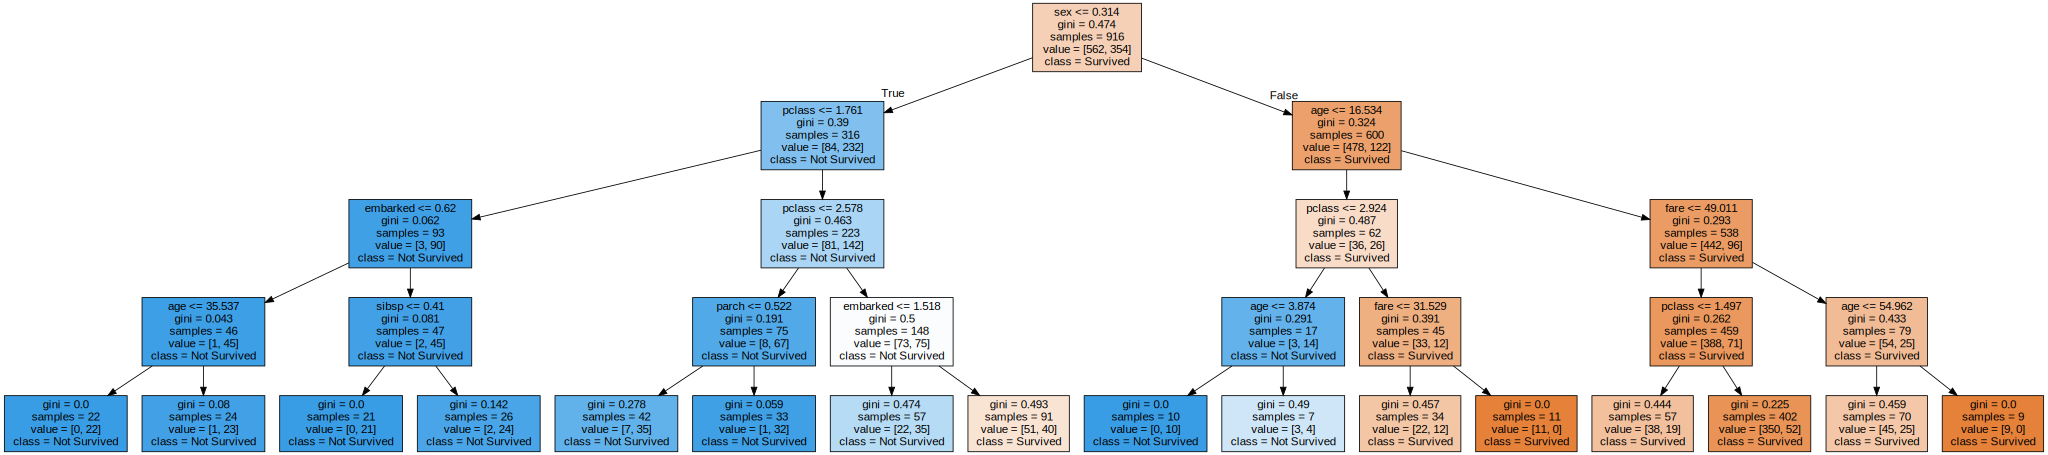

In [49]:
import graphviz
dot_data = tree.export_graphviz(clf, out_file=None, 
                                feature_names=Xtrain.columns,  
                                class_names=["Survived","Not Survived"],
                                filled=True)

graph = graphviz.Source(dot_data, format="png") 
graph

In [48]:
graph.render("decision_tree")

'decision_tree.png'

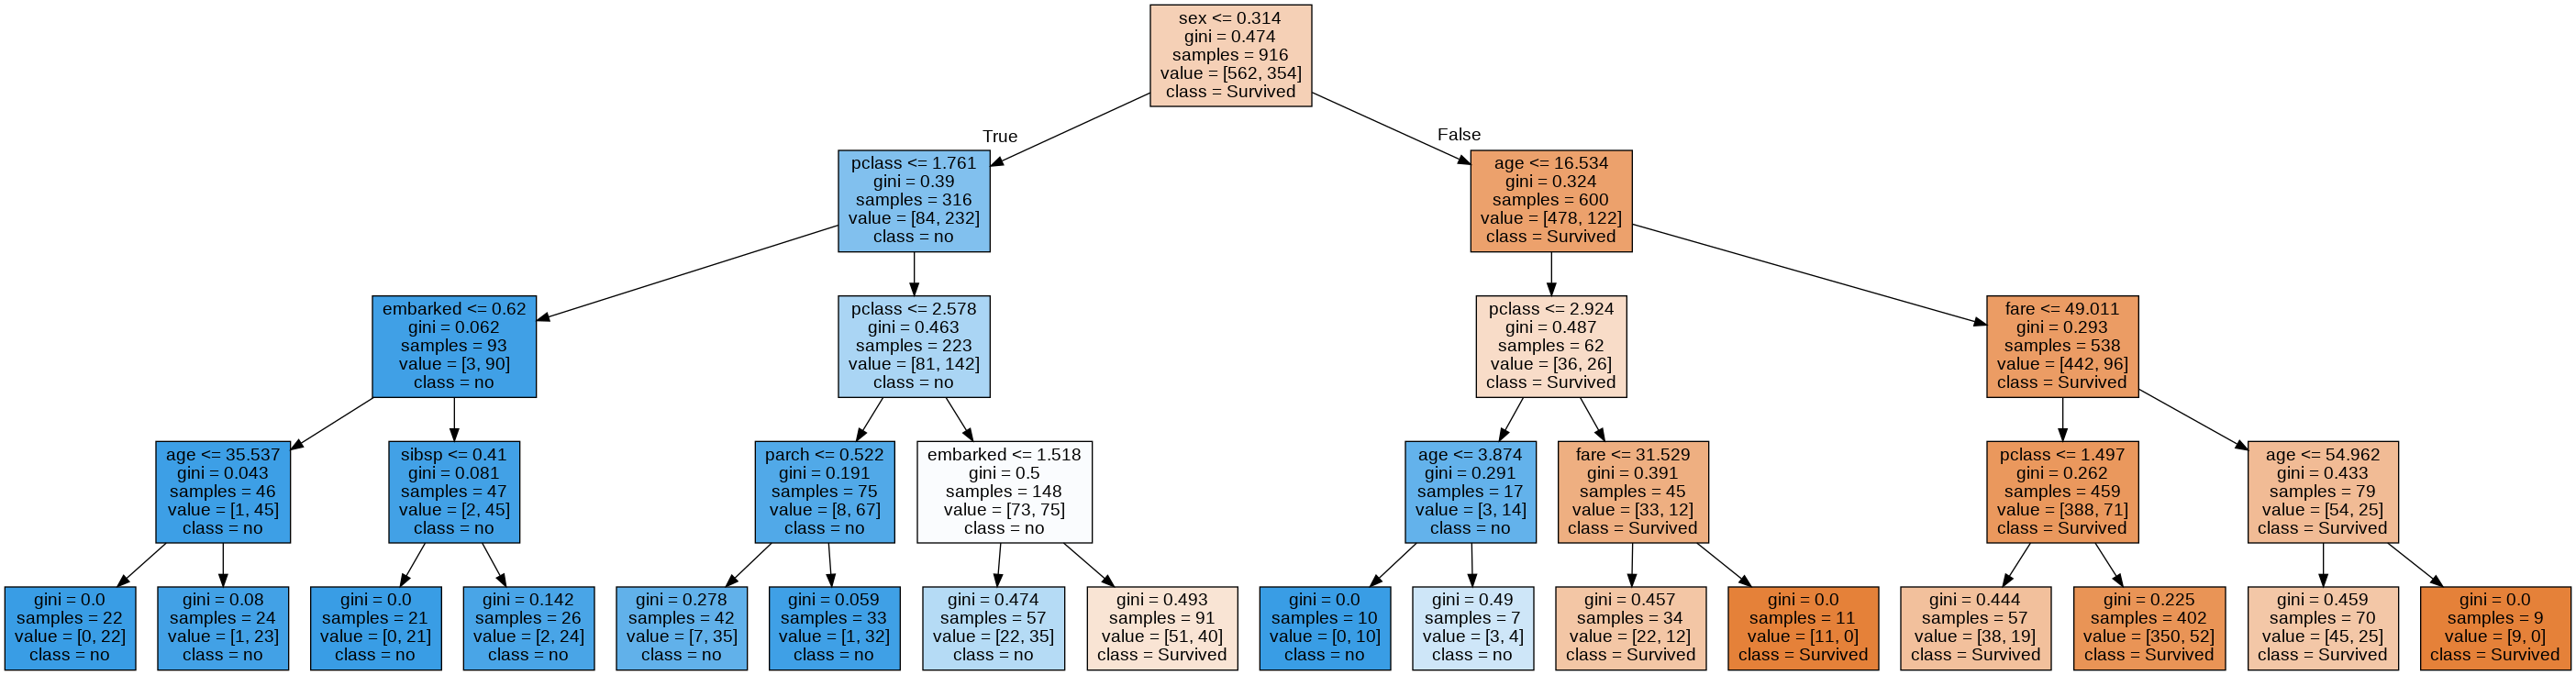

## Plot no. 2

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:3208: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asarray(a).size
/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


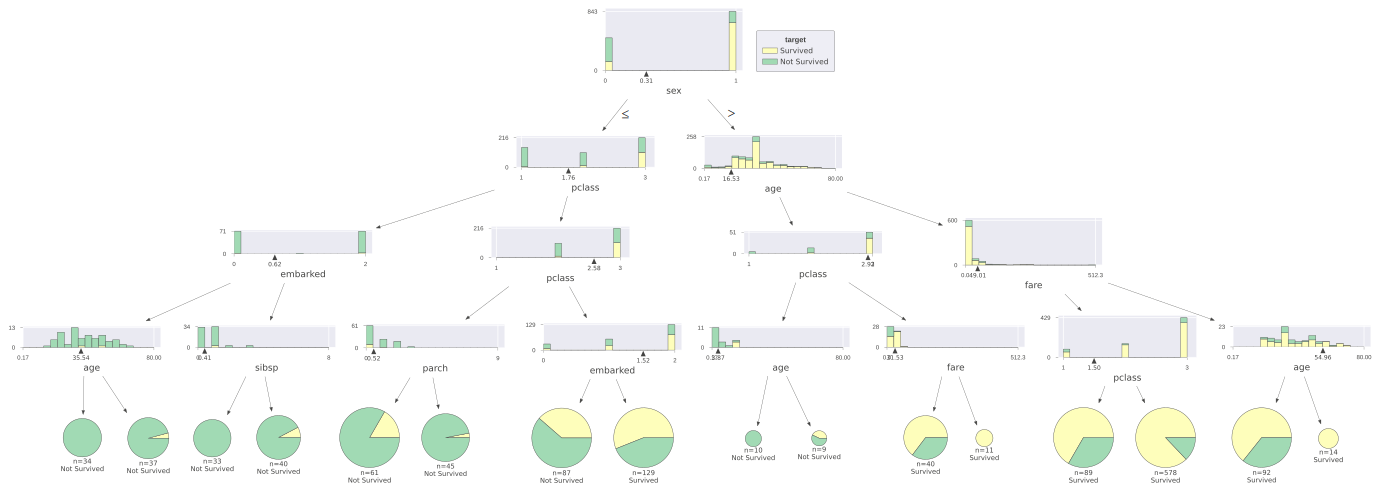

In [50]:
from dtreeviz.trees import dtreeviz # remember to load the package

viz = dtreeviz(clf, X, y,
                target_name="target",
                feature_names=Xtrain.columns,  
                                class_names=["Survived","Not Survived"])

viz

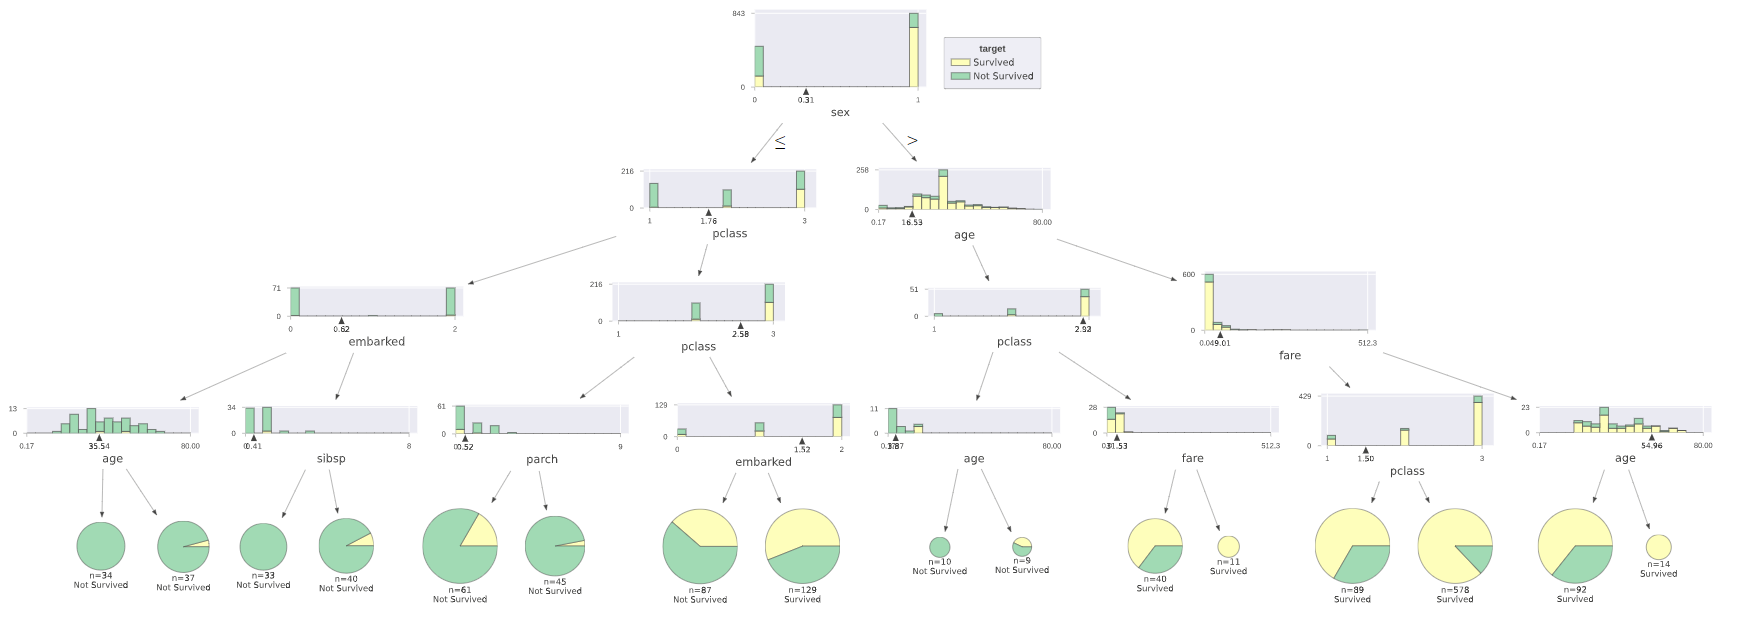